# Logical expression used in scopus

![Exemplo de imagem](./imgs/filter.png)


# Libraries used

In [45]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import statistics

# Loading the CSV file into a dataframe

In [46]:
# Carregar o arquivo CSV em um dataframe
df_scopus = pd.read_csv('scopus.csv')

# Exibir o número de artigos presentes no dataframe
print('Number of articles in the file:', df_scopus.shape[0])

# Exibir as primeiras linhas do dataframe para verificar se os dados foram carregados corretamente
df_scopus.head()

Number of articles in the file: 490


,Authors,Author full names,Author(s) ID,Title,Year,Link,EID
0,Sousa E.L.D.; Marques L.A.D.A.; Lima I.D.S.F.D...,"Sousa, Ewerton L. de (58548243300); Marques, L...",58548243300; 58548808500; 58548808600; 5854796...,Development a Low-Cost Wireless Smart Meter wi...,2023,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85168716286
1,Mendes D.S.; Silva D.N.N.; Santiago L.E.P.; Go...,"Mendes, Dayene Santiago (58592257000); Silva, ...",58592257000; 57641802400; 57203996687; 5585116...,Comprehensive risk assessment of microplastics...,2024,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85198505934
2,Thomas L.; Saglia R.; Pasquini L.; Brucalassi ...,"Thomas, Luis (58487755200); Saglia, Roberto (7...",58487755200; 7004160690; 7006771898; 366369949...,Search for giant planets in M 67 V: A warm Jup...,2024,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85194400270
3,Ciralli B.; Malfatti T.; Lima T.Z.; Silva S.R....,"Ciralli, Barbara (57222123856); Malfatti, Thaw...",57222123856; 57204524582; 57221460274; 5619540...,Alterations of auditory sensory gating in mice...,2023,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85174053612
4,da Silva T.P.; Batista T.V.; Delicato F.C.; Pi...,"da Silva, Thiago Pereira (56732537200); Batist...",56732537200; 36812228000; 55887461400; 5559537...,An online ensemble method for auto-scaling NFV...,2024,https://www.scopus.com/inward/record.uri?eid=2...,2-s2.0-85191989591


# Graph creation

In [47]:
# Criar um conjunto para armazenar os nomes dos autores (a estrutura de dados set não permite elementos duplicados)
author_set = set()
G = nx.Graph()

# Iterar sobre cada linha do dataframe
for authors in df_scopus['Authors']:
    # Separar os nomes dos autores
    author_list = authors.split('; ')
    # Adicionar cada autor ao conjunto
    for author in author_list:
        author_set.add(author)
    # Adicionar arestas entre todos os autores da mesma linha
    for i in range(len(author_list)):
        for j in range(i + 1, len(author_list)):
            G.add_edge(author_list[i], author_list[j])

# Obter a quantidade de vértices no grafo
num_vertices = G.number_of_nodes()
print(f"Number of nodes in the graph: {num_vertices}")

# Obter a quantidade de arestas no grafo
num_arestas = G.number_of_edges()
print(f"Number of links in the graph: {num_arestas}")

Number of nodes in the graph: 10472
Number of links in the graph: 3789432


# Graph plot

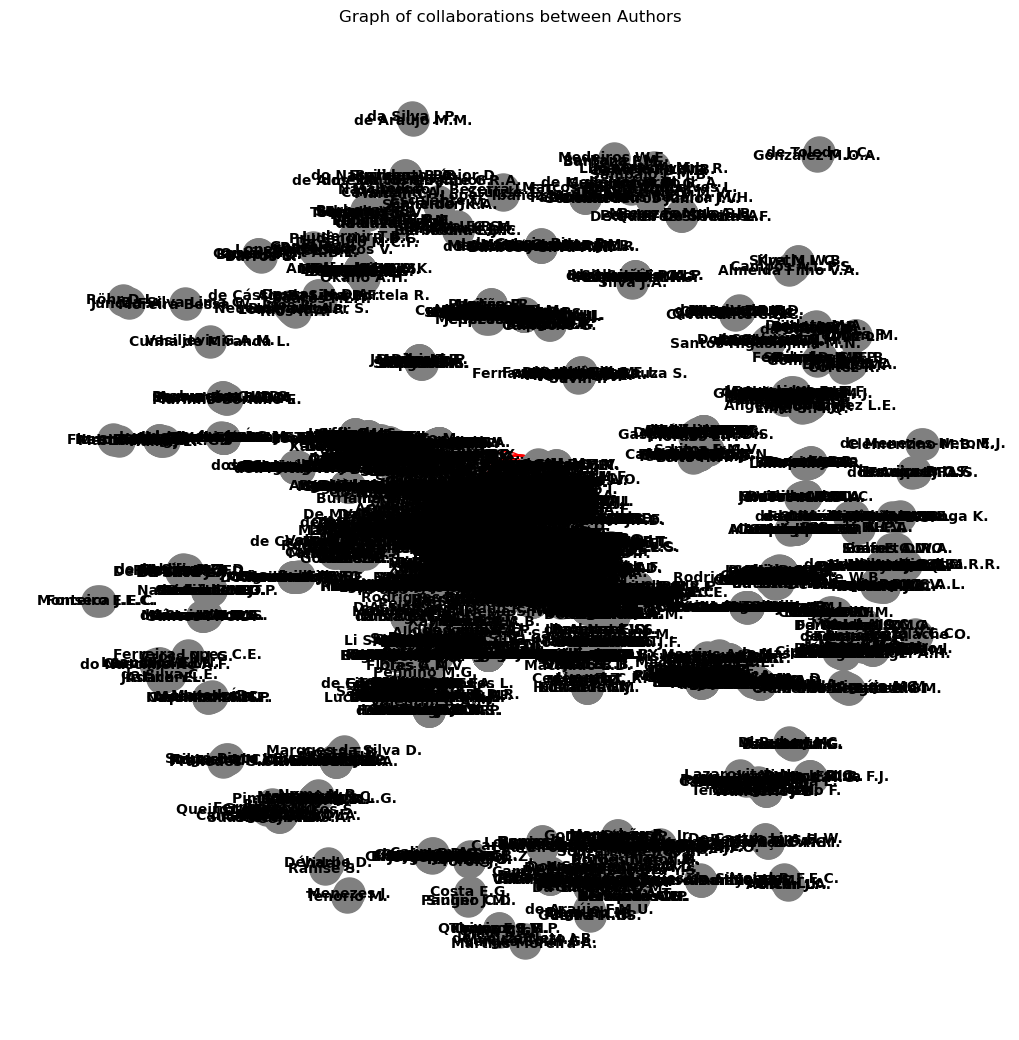

In [48]:
# Visualizar o grafo
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, node_size=500, node_color="gray", font_size=10, font_color="black", font_weight="bold", edge_color="red")
plt.title("Graph of collaborations between Authors")
plt.show()

# Density of the network

In [49]:
# Calcular a densidade da rede
density = nx.density(G)
print(f"Density of the network: {density}")

Density of the network: 0.06911722937497204


# Average degree of the network

In [50]:
# Calcular o average degree da rede
average_degree = statistics.mean(dict(G.degree()).values())
print(f"Average degree of the network: {average_degree}")

Average degree of the network: 723.7265087853323


# Interquartile range

In [51]:
# Obter os graus dos nós
degrees = np.array([degree for node, degree in G.degree()])

# Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil)
Q1 = np.percentile(degrees, 25)
Q3 = np.percentile(degrees, 75)

# Calcular o IQR (intervalo interquartil)
IQR = Q3 - Q1

# Definir os limites para identificar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificar os outliers
outliers = [degree for degree in degrees if degree < lower_bound or degree > upper_bound]

print(f"Outliers: {outliers}")
print(f"Number of outliers: {len(outliers)}")

Outliers: [2392, 2392, 2392, 2591, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2391, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2394, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2635, 2391, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2945, 2392, 2392, 2392, 2391, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2394, 2434, 2392, 3424, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 3113, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2385, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2392, 2385, 2392, 2392, 2392, 2392, 2811, 2392, 2392, 2392,

# Sub-graph plot (1)

Number of nodes in the subgraph: 5191
Number of links in the subgraph 3256018


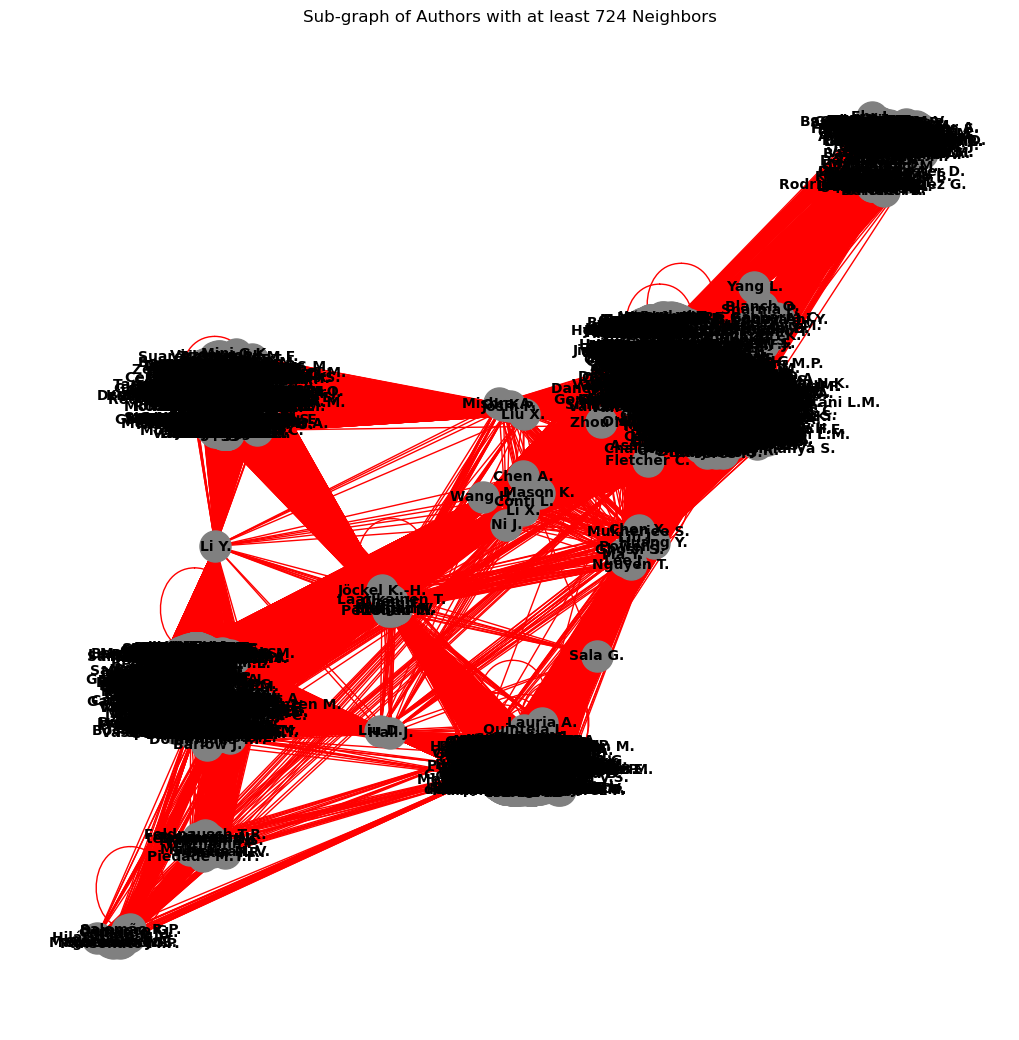

In [53]:
# Definir o limite mínimo de vizinhos
min_neighbors = 724

# Criar uma lista de nós que atendem ao critério
nodes_with_min_neighbors = [node for node, degree in G.degree() if degree >= min_neighbors]

# Criar o sub-grafo
subgraph = G.subgraph(nodes_with_min_neighbors)

# Exibir informações sobre o sub-grafo
print(f"Number of nodes in the subgraph: {subgraph.number_of_nodes()}")
print(f"Number of links in the subgraph {subgraph.number_of_edges()}")

# Visualizar o sub-grafo
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=True, node_size=500, node_color="gray", font_size=10, font_color="black", font_weight="bold", edge_color="red")
plt.title("Sub-graph of Authors with at least 724 Neighbors")
plt.show()

# Sub-graph plot (2)

Number of nodes in the subgraph: 1621
Number of links in the subgraph 1206448


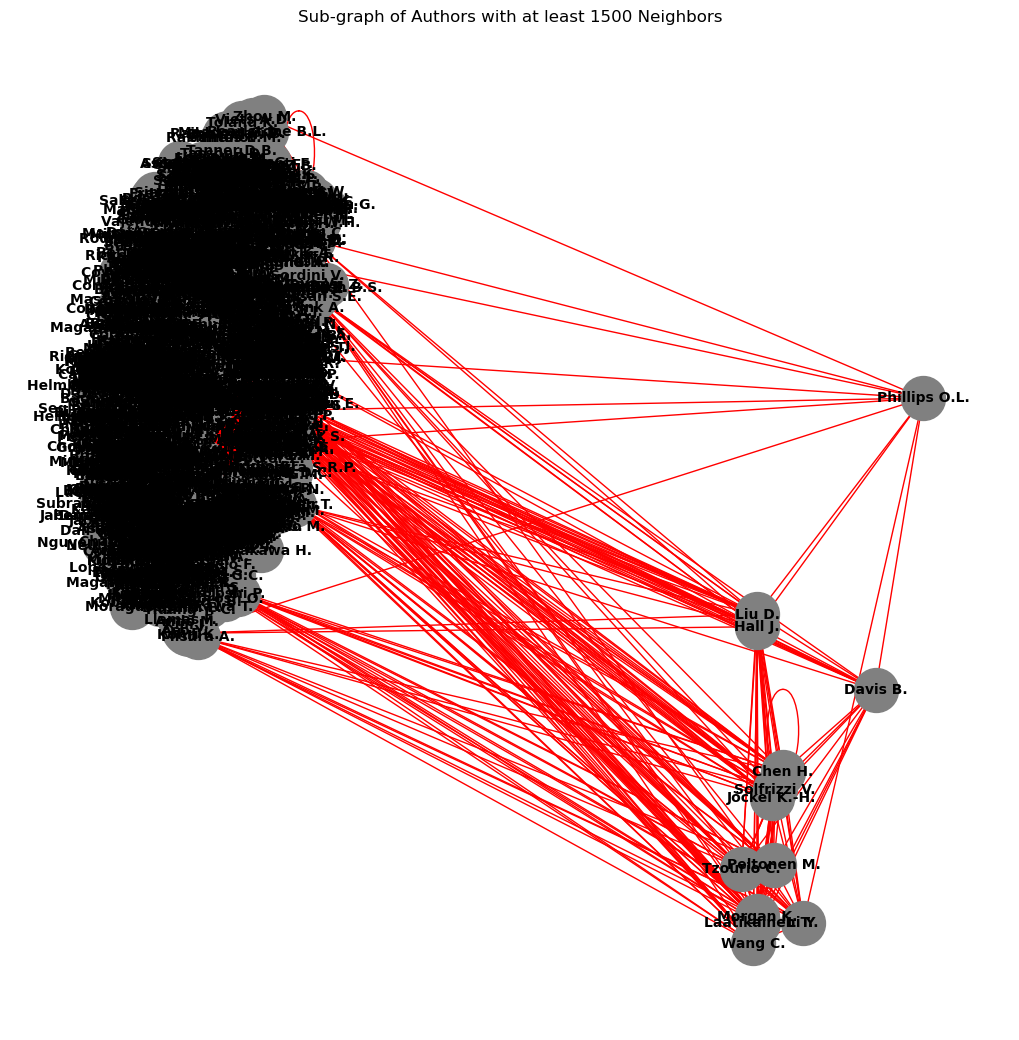

In [54]:
# Definir o limite mínimo de vizinhos
min_neighbors = 1500

# Criar uma lista de nós que atendem ao critério
nodes_with_min_neighbors = [node for node, degree in G.degree() if degree >= min_neighbors]

# Criar o sub-grafo
subgraph = G.subgraph(nodes_with_min_neighbors)

# Exibir informações sobre o sub-grafo
print(f"Number of nodes in the subgraph: {subgraph.number_of_nodes()}")
print(f"Number of links in the subgraph {subgraph.number_of_edges()}")

# Visualizar o sub-grafo
plt.figure(figsize=(10, 10))
nx.draw(subgraph, with_labels=True, node_size=1000, node_color="gray", font_size=10, font_color="black", font_weight="bold", edge_color="red")
plt.title("Sub-graph of Authors with at least 1500 Neighbors")
plt.show()

# Sub-graph plot (3)

Number of nodes in the subgraph: 9
Number of links in the subgraph 39


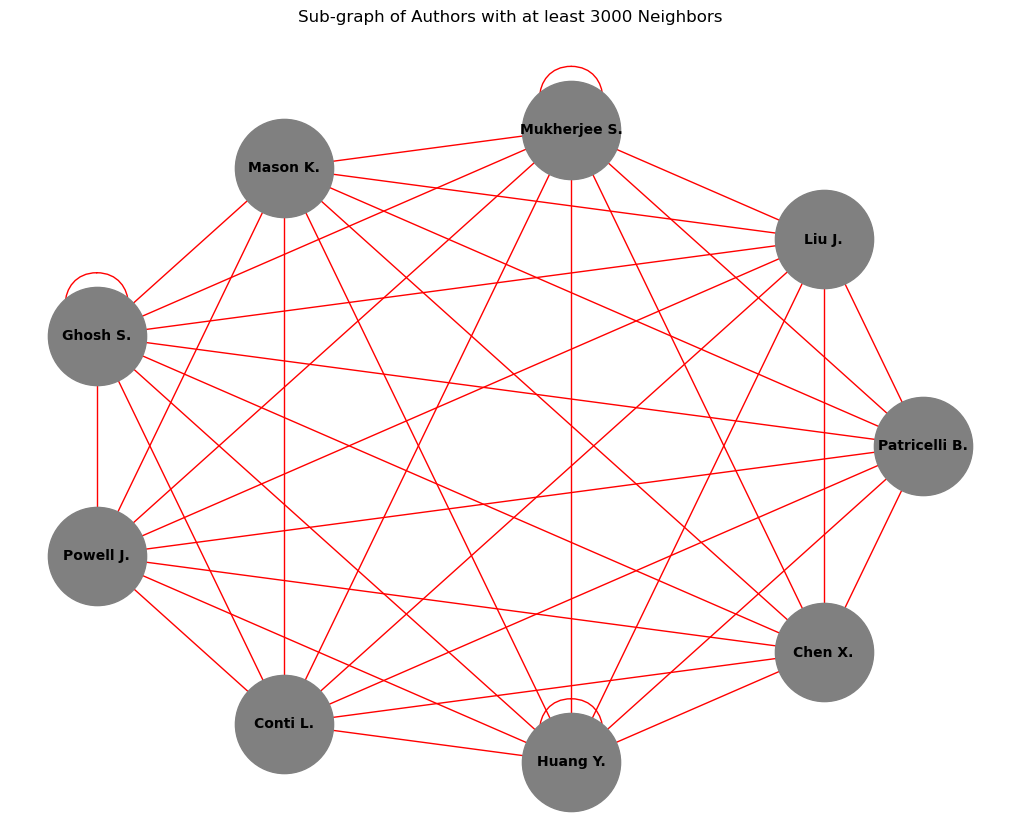

In [55]:
# Definir o limite mínimo de vizinhos
min_neighbors = 3000

# Criar uma lista de nós que atendem ao critério
nodes_with_min_neighbors = [node for node, degree in G.degree() if degree >= min_neighbors]

# Criar o sub-grafo
subgraph = G.subgraph(nodes_with_min_neighbors)

# Exibir informações sobre o sub-grafo
print(f"Number of nodes in the subgraph: {subgraph.number_of_nodes()}")
print(f"Number of links in the subgraph {subgraph.number_of_edges()}")

# Visualizar o sub-grafo
plt.figure(figsize=(10, 8))
nx.draw_circular(subgraph, with_labels=True, node_size=5000, node_color="gray", font_size=10, font_color="black", font_weight="bold", edge_color="red")
plt.title("Sub-graph of Authors with at least 3000 Neighbors")
plt.show()

# Histogram plot

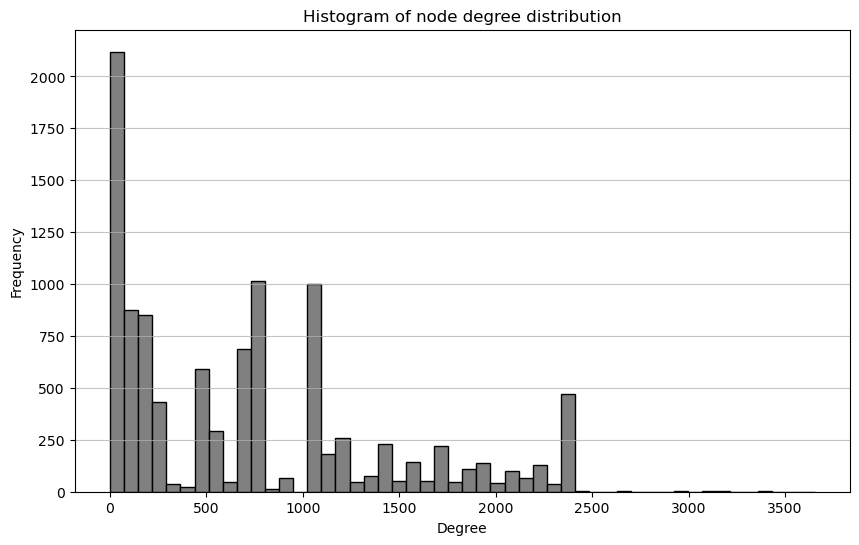

In [56]:
# Obter os graus dos nós
degrees = [degree for node, degree in G.degree()]

# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='gray', edgecolor='black')
plt.title('Histogram of node degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()